# Synthetic data example
In this note, we plot results from a synthetic data example, with unmeasured confounding. We use this to motivate our methodology  
$X_0 \sim \mathcal{N}(0,1)$  
$U \sim Bern(p)$  
$A \mid U=1 \sim Bern(0.8)$  
$A \mid U=0 \sim Bern(0.05)$  
$X_t(a) = X_{t-1}(a) + 1(a=1)(1(u=1)\beta_1 + 1(u=0)\beta_2) + \epsilon_t$  

In [883]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [884]:
beta_1 = 3
beta_2 = 0

n=100000
T = 61
t_act = 31

def x_t(a_t, x_prev, u, t):
    return x_prev + (a_t==1)*(beta_1*(u==1) + beta_2*(u==0)) + np.random.normal(0, 1.5, x_prev.shape[0])


In [885]:
def action(u):
    return np.random.binomial(1, 0.9, size=u.shape[0])*(u==1) + np.random.binomial(1, 0.05, size=u.shape[0])*(u==0)


In [886]:
data = pd.DataFrame()

data['U'] = np.random.binomial(1, 0.1, size=n)
data['X_0'] = np.random.normal(50, 1, size=n)

for t in range(1, T):
    if t < t_act:
        data[f'X_{t}'] = x_t(a_t=0, x_prev=np.array(data[f'X_{t-1}']), u=np.array(data['U']), t=t)
    if t == t_act:
        data[f'A'] = action(np.array(data['U']))
    if t >= t_act:
        data[f'X_{t}'] = x_t(a_t=np.array(data[f'A']), x_prev=np.array(data[f'X_{t-1}']), u=np.array(data['U']), t=t)
        

In [887]:
data

,U,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_51,X_52,X_53,X_54,X_55,X_56,X_57,X_58,X_59,X_60
0,1,49.000014,50.968766,53.113469,54.412894,53.110376,55.976761,53.524661,52.875254,52.063248,...,117.641678,120.985726,125.406084,127.342725,130.994443,133.396350,135.807020,138.603203,142.800826,147.057919
1,0,50.350610,49.412053,46.710195,46.940687,49.888219,51.118698,51.599591,50.907768,51.554262,...,38.819216,37.185907,40.675380,42.880421,44.949492,42.871427,45.959521,45.546239,47.266351,50.037482
2,0,50.318408,47.510363,47.130854,46.564625,48.228783,47.121324,46.765604,45.796936,44.249687,...,52.575981,49.822115,49.485303,49.067141,46.748275,46.713982,44.862193,45.662940,44.218720,42.985306
3,0,49.830156,49.052678,49.198403,47.736525,48.076183,49.102589,50.327912,49.516093,49.746652,...,62.162124,61.634463,64.279991,65.842700,66.308536,63.995950,64.795869,64.662780,63.648327,63.006586
4,0,50.493410,50.905433,51.822320,51.627014,53.623863,54.656609,55.620921,57.147552,56.830293,...,58.357805,58.588361,56.695574,56.284520,53.664924,52.194811,49.640894,50.668466,51.656657,49.919093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,50.593190,51.334377,49.722652,50.619264,48.702103,47.648840,46.684393,44.747870,44.858910,...,22.213514,21.221985,20.956988,20.536911,23.215775,22.592001,21.961170,21.574600,23.605992,24.328422
99996,0,49.558114,49.194184,50.869864,53.705675,52.710484,51.833607,52.029566,50.757660,51.865245,...,63.020594,64.149784,61.794055,61.400768,62.392671,62.129055,61.522415,61.513103,62.445980,62.735354
99997,0,49.579586,52.095703,53.687476,53.983149,52.713647,50.061001,47.680958,46.862244,48.010289,...,56.903964,56.904842,56.707536,56.322336,54.444558,56.378478,53.757707,53.343347,51.591945,51.378064
99998,1,49.816195,53.999922,53.852427,53.905918,53.250780,53.866282,51.638329,50.704405,47.843344,...,120.713965,124.991482,125.956719,129.092964,132.444026,135.708783,138.270188,142.814735,145.313326,149.507763


In [888]:
data_subset = data.loc[data['A']==1]

In [889]:
import matplotlib.pyplot as plt

In [890]:
mean_obs = [] 
q05_obs = []
q95_obs = []
for t in range(T):
    mean_obs.append(data_subset[f'X_{t}'].mean())
    q05_obs.append(data_subset[f'X_{t}'].quantile(0.05))
    q95_obs.append(data_subset[f'X_{t}'].quantile(0.95))

In [891]:
interventional_data = data.loc[:,['U', 'X_0']]

for t in range(1, T):
    if t < t_act:
        interventional_data[f'X_{t}'] = x_t(a_t=0, x_prev=np.array(interventional_data[f'X_{t-1}']), u=np.array(interventional_data['U']), t=t)
    if t == t_act:
        interventional_data[f'A'] = 1
    if t >= t_act:
        interventional_data[f'X_{t}'] = x_t(a_t=np.array(interventional_data[f'A']), x_prev=np.array(interventional_data[f'X_{t-1}']), u=np.array(interventional_data['U']), t=t)
        

In [892]:
mean_int = [] 
q05_int = []
q95_int = []
for t in range(T):
    mean_int.append(interventional_data[f'X_{t}'].mean())
    q05_int.append(interventional_data[f'X_{t}'].quantile(0.05))
    q95_int.append(interventional_data[f'X_{t}'].quantile(0.95))

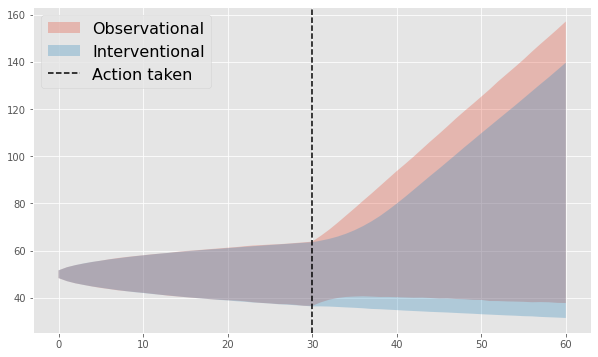

In [893]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
plt.fill_between(range(T), q05_obs, q95_obs, alpha=0.3, label='Observational')
plt.fill_between(range(T), q05_int, q95_int, alpha=0.3, label='Interventional')
plt.axvline(t_act-1, color='k', linestyle='--', label='Action taken')
plt.legend(loc='upper left', fontsize=16)


149it [00:01, 83.27it/s]
149it [00:02, 57.07it/s]


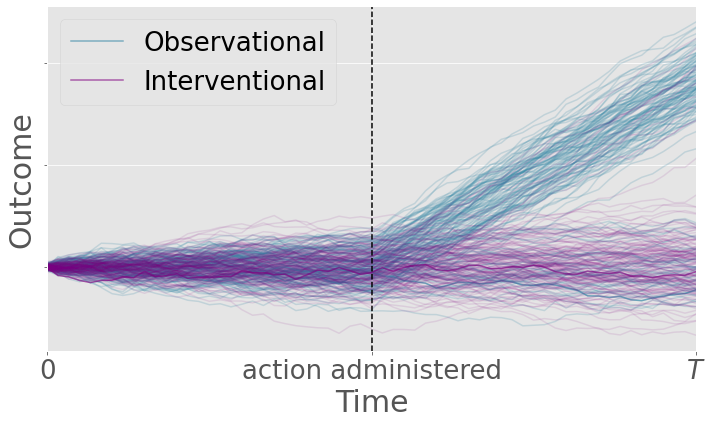

In [894]:
import seaborn as sns
fig, axs = plt.subplots(1, 1, figsize=(10,6))
plt.style.use('ggplot')

max_count = 150
i=0
for index, row in tqdm(data_subset.iterrows()):
    i += 1
    plt.plot(range(T), row[[f'X_{t}' for t in range(T)]], color=sns.color_palette("mako", 10)[5], alpha=0.2)
    if i == max_count:
        plt.plot(range(T), row[[f'X_{t}' for t in range(T)]], color=sns.color_palette("mako", 10)[5], alpha=0.6, label='Observational')
        break

i=0        
for index, row in tqdm(interventional_data.iterrows()):
    i += 1
    plt.plot(range(T), row[[f'X_{t}' for t in range(T)]], color='purple', alpha=0.1)
    if i == max_count:
        plt.plot(range(T), row[[f'X_{t}' for t in range(T)]], color='purple', alpha=0.6, label='Interventional')
        break

plt.axvline(t_act-1, color='k', linestyle='--')
plt.legend(loc='upper left', fontsize=26)
plt.xlim([0, 60])

axs.set_xticks([0, t_act-1, 60])
axs.set_yticklabels([])
axs.set_xticklabels(['$0$', 'action administered', '$T$'])
axs.tick_params(axis='both', which='major', labelsize=26)
axs.tick_params(axis='both', which='minor', labelsize=26)
plt.xlabel('Time', fontsize=30)
plt.ylabel('Outcome', fontsize=30)
plt.tight_layout()

plt.savefig("/data/localhost/not-backed-up/taufiq/HypothesisTesting/hyp_testing_new_pulse_data_2/images/synthetic_example.pdf", format='pdf', bbox_inches='tight')
